In [7]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("INpreprocessed.csv")

In [9]:
response = requests.get(df.file_path[0])
img = Image.open(BytesIO(response.content))

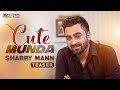

In [10]:
display(img)

In [25]:
np.asarray(img)[0,0]

array([7, 1, 0], dtype=uint8)

In [26]:
np.asarray(img).shape

(90, 120, 3)

In [27]:
def get_rgb(filename):
    img = np.asarray(Image.open(open(filename, 'rb')))
    return img.reshape(-1, 3)

In [29]:
im = get_rgb(df.file_path[0].replace(
        "https://raw.githubusercontent.com/sheelfshah/iitb_ds203_project/master/", ""))
im[0]

array([7, 1, 0], dtype=uint8)

In [31]:
import sklearn
from sklearn.cluster import MiniBatchKMeans

In [32]:
km = MiniBatchKMeans(n_clusters=10, batch_size=90*120)

In [33]:
for i, path in enumerate(df.file_path.sample(frac=1)):
    im = get_rgb(path.replace(
        "https://raw.githubusercontent.com/sheelfshah/iitb_ds203_project/master/", ""))
    km = km.partial_fit(im)
    if (i+1)%5000==0:
        break

In [44]:
lab = km.labels_
y = np.bincount(lab)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[   0, 3302],
       [   1, 2396],
       [   2,  419],
       [   3,  469],
       [   4,  744],
       [   5, 2323],
       [   6,  453],
       [   7,  613],
       [   8,   73],
       [   9,    8]])

In [45]:
cc = km.cluster_centers_
cc[ii]

array([[  4.2445854 ,   2.55951758,   3.14489588],
       [212.69925997, 198.98233887, 188.81892669],
       [152.61160194, 115.64510167,  95.72354946],
       [166.08060437, 153.82999843, 153.79631352],
       [ 46.62121719,  36.07431954,  39.3652881 ],
       [240.74680244, 240.10892076, 238.28146074],
       [ 56.41301106, 112.6708057 , 165.16991775],
       [ 90.78762716,  79.22264074,  73.13620551],
       [162.06598161,  43.67564402,  34.96788523],
       [225.57938495, 180.45187465,  87.99895667]])

In [46]:
cc[ii].shape

(10, 3)

In [48]:
cc = np.c_[cc[ii], np.ones(cc[ii].shape[0])*255]

In [49]:
cc

array([[  4.2445854 ,   2.55951758,   3.14489588, 255.        ],
       [212.69925997, 198.98233887, 188.81892669, 255.        ],
       [152.61160194, 115.64510167,  95.72354946, 255.        ],
       [166.08060437, 153.82999843, 153.79631352, 255.        ],
       [ 46.62121719,  36.07431954,  39.3652881 , 255.        ],
       [240.74680244, 240.10892076, 238.28146074, 255.        ],
       [ 56.41301106, 112.6708057 , 165.16991775, 255.        ],
       [ 90.78762716,  79.22264074,  73.13620551, 255.        ],
       [162.06598161,  43.67564402,  34.96788523, 255.        ],
       [225.57938495, 180.45187465,  87.99895667, 255.        ]])

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

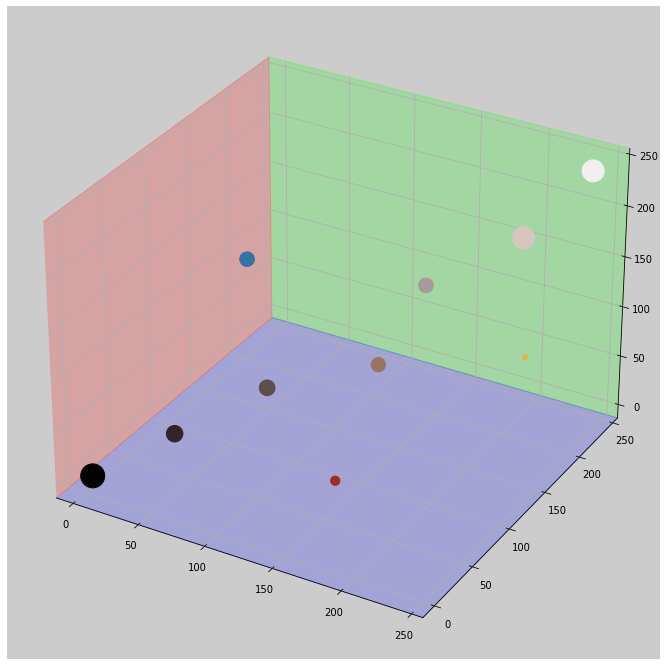

In [51]:
fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
ax.scatter3D(cc[:, 0], cc[:, 1], cc[:, 2], color=cc/255, s=10*np.sqrt(y[ii]), depthshade=False)
ax.w_xaxis.set_pane_color((1, 0, 0, 0.2))
ax.w_yaxis.set_pane_color((0, 1, 0, 0.2))
ax.w_zaxis.set_pane_color((0, 0, 1, 0.2))
ax.set_facecolor((0.8, 0.8, 0.8))